# Efficiency and Diversity of R&D in Knowledge‑Intensive Services (2005‑2023)

## Introduction

The knowledge‑intensive services sector ('G‑N' sector in NACE classification, list available: __[LINK](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:High-tech_classification_of_manufacturing_industries)__) – including wholesale & retail trade, transportation, information & communication, finance, professional activities and administrative services – has become a major engine of innovation in Europe. 

A growing body of confessions suggests that gender diversity within research and development (R&D) teams enhances creativity and innovation. As Scientific American reports, diverse groups “are more innovative, more diligent, and better at solving complex problems” because they are able to produce and apply different perspectives (Phillips, 2014). Furthermore, firms with greater gender diversity tend to achieve higher productivity and innovation performance, particularly in knowledge-intensive sectors where collaboration and problem-solving are key (Hoogendoorn et al., 2019). The business press echoes this view — Forbes (Carucci, 2024) reports that companies introducing diversity consistently outperform rivals. 

The goal is to analyse how efficiently countries from the EU and EFTA convert R&D spending in the knowledge‑intensive services sector into human capital and to examine whether increasing female participation correlates with improved efficiency and labour intensity. Relative shares and growth rates over time will be central to the analysis.

**External data sources:**

To allow for a comparison of the above-mentioned metrics, three data sources were used:

- Business enterprise R&D expenditure in high-tech sectors by NACE Rev. 2 __[LINK: htec_sti_exp2](https://ec.europa.eu/eurostat/databrowser/view/htec_sti_exp2/default/table)__

- Business enterprise R&D personnel in high-tech sectors by NACE Rev. 2 __[LINK: htec_sti_pers2](https://ec.europa.eu/eurostat/databrowser/view/htec_sti_pers2/default/table)__

- R&D personnel and researchers in business enterprise sector by NACE Rev. 2 activity and sex __[LINK: rd_p_bempoccr2](https://db.nomics.world/Eurostat/rd_p_bempoccr2?dimensions=%7B%22freq%22%3A%5B%22A%22%5D%2C%22nace_r2%22%3A%5B%22G-N%22%5D%7D&tab=table)__ 

**Objectives**:

- O1 Load prepared datasets, filter and rename variables, review missing data.

- O2 Analyse sector's spending efficiency and labor intensity across EU and EFTA countries.

- O3 Analyse participation of female researchers and its relationship to the sector's growth rates.

**Already achieved**:

External data sources were scraped, initially preprocessed and merged using *scraper_code.ipynb*. Dataset *htec_sti_exp2* includes annual data (2005‑2023) on business‑sector research & development (R&D) expenditure ('GDE Euro', in millions) across a set of EU and EFTA countries (list avaliable: __[LINK](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Country_codes)__). Dataset *htec_sti_pers2* describes the structure of personnel (full‑time equivalents, FTE) in NACE sectors. R&D personnel include researchers (professionals engaged in creating new knowledge, 'FTE Researcher') and all staff combined ('FTE All'). Finally, dataset *rd_p_bempoccr2* splits researchers by sex ('FTE Researcher Fem'). 

File metadata:

In [1]:
# __author__ = Dominika Drazyk
# __maintainer__ = Dominika Drazyk
# __email__ = dominika.a.drazyk@gmail.com
# __copyright__ = Dominika Drazyk
# __license__ = Apache License 2.0
# __version__ = 1.0.0
# __status__ = Production
# __date__ = 30/09/2025

Required libraries and custom styles:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import shapiro
import os

custom_params = {"font.size": 16, "axes.titlesize": 14, "axes.labelsize": 10, "legend.fontsize": 10, 
                 'axes.facecolor':'white', 'figure.facecolor':'white', "grid.color": 'lightgray', 
                 "axes.edgecolor": '#3D3D3D', 'xtick.color': '#3D3D3D', 'ytick.color': '#3D3D3D',
                 "grid.linewidth": 1, "axes.linewidth": 1.25, 'xtick.bottom': True, 
                 'ytick.left': True, "xtick.major.size": 5, "ytick.major.size": 5, 
                 "xtick.minor.size": 2, "ytick.minor.size": 2}
sns.set_theme(context = 'paper', palette = 'muted', font = "Rubik", rc = custom_params)
pd.options.display.precision = 3
plt.style.use("custom.mplstyle")

Functions:

In [3]:
def filter_countries(row):
    global set_of_countries
    if row['geo'] in set_of_countries:
        return 'in'
    else: 
        return 'out'

## O1 Data Analysis Pipeline

Dataset loading, variable filtering and renaming, missing data analysis, and data quality assessment.

### O1.1 Loading datasets

Loading the preprocessed datasets including the main analysis dataset, metadata, and country reference data.

In [4]:
df = pd.read_csv('../data/scraper_data.csv')
print(f"✓ Main dataset loaded: {len(df):,} records")

✓ Main dataset loaded: 10,032 records


In [5]:
mdf = pd.read_csv('../data/scraper_metadata.csv')
print(f"✓ Metadata loaded: {len(mdf):,} records")

✓ Metadata loaded: 3 records


In [6]:
euefta = pd.read_csv('../data/eu_efta_countries.csv')
print(f"✓ EU + EFTA countries loaded: {len(euefta):,} countries\n")

✓ EU + EFTA countries loaded: 31 countries



### O1.2 Filtering and renaming variables

Data type conversions, filtering datasets by NACE classification and geographic set, and renaming variables for clarity.

All variables have a correct data type, except for *time*, which should be of type *datetime*.

In [7]:
print("• Converting time to datetime format")
df['time'] = df['time'].astype('int32')
df['Year'] = pd.to_datetime(df['time'], format = '%Y', errors = 'coerce')
nan_pct = df.time.isnull().sum()*100/len(df.time)
print(f"• Year conversion: {nan_pct:.0f}% values converted to NaT")

• Converting time to datetime format
• Year conversion: 0% values converted to NaT


In [8]:
print("• Filtering by NACE classification")
df = df[df['nace_r2'] == "G-N"]
print(f"• NACE type included: {df.nace_r2.unique()}")

print("• Filtering by EU + EFTA countries")
global set_of_countries
set_of_countries = euefta['geo'].values
df['geo_euefta'] = df.apply(filter_countries, axis = 1)
df = df[df['geo_euefta'] == 'in']
print(f"• Countries included: {len(df.geo.unique())} EU + EFTA countries")
df = pd.merge(df, euefta, on = ['geo'], how = 'left') 

• Filtering by NACE classification
• NACE type included: ['G-N']
• Filtering by EU + EFTA countries
• Countries included: 30 EU + EFTA countries


In [9]:
print("• Renaming columns for clarity")
df = df.rename(columns = {"pers2_FTE_RSE": "FTE Researcher",
                          "pers2_FTE_TOTAL": "FTE All",
                          "fem2_FTE_RSE" : "FTE Researcher Fem",
                          "exp2_MIO_EUR": "GDE Euro"})

print("• Removing unused columns")
df = df.drop(['pers2_HC_RSE', 'pers2_HC_TOTAL', 'exp2_PC_TOT', 'nace_r2', 'geo_euefta', 'time'], axis = 1)
df = df[['Country', 'geo', 'Year', 'GDE Euro', 'FTE All', 'FTE Researcher', 'FTE Researcher Fem']]

print(f"Pre-processed Dataset Preview:")
print(f"• Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print("• Sample data:")
print(df.sample(3))

• Renaming columns for clarity
• Removing unused columns
Pre-processed Dataset Preview:
• Shape: 3,914 rows × 7 columns
• Sample data:
      Country geo       Year  GDE Euro  FTE All  FTE Researcher  \
3468  Romania  RO 2017-01-01   327.040   6338.0          3180.0   
45    Austria  AT 2011-01-01  1986.697  14977.4          9234.9   
2189  Iceland  IS 2019-01-01   267.792      NaN             NaN   

      FTE Researcher Fem  
3468              2184.0  
45                9234.9  
2189                 NaN  


### O1.3 Missing data analysis

Missing data assessment to identify data quality issues, checking data completeness, and selecting countries with sufficient data coverage for reliable analysis.

#### The percentage of data entry gaps per column

In [10]:
nan_count = df.isna().sum()
all_count = df.iloc[:,0].count()
prc = (nan_count * 100)/all_count
print("Missing Data by Column:")
for col, pct in prc.items():
    if pct > 0:
        print(f"• {col}: {pct:.0f}% missing")

Missing Data by Column:
• GDE Euro: 26% missing
• FTE All: 27% missing
• FTE Researcher: 29% missing
• FTE Researcher Fem: 35% missing


The female researcher full-time equivalent variable (*FTE Researcher Fem*) includes signifficant number of missing data (~35%) among all choen metrics.

#### The percentage of data entry gaps per country

✓ Saved: Fig1.3.1 The percentage of NaN values per country


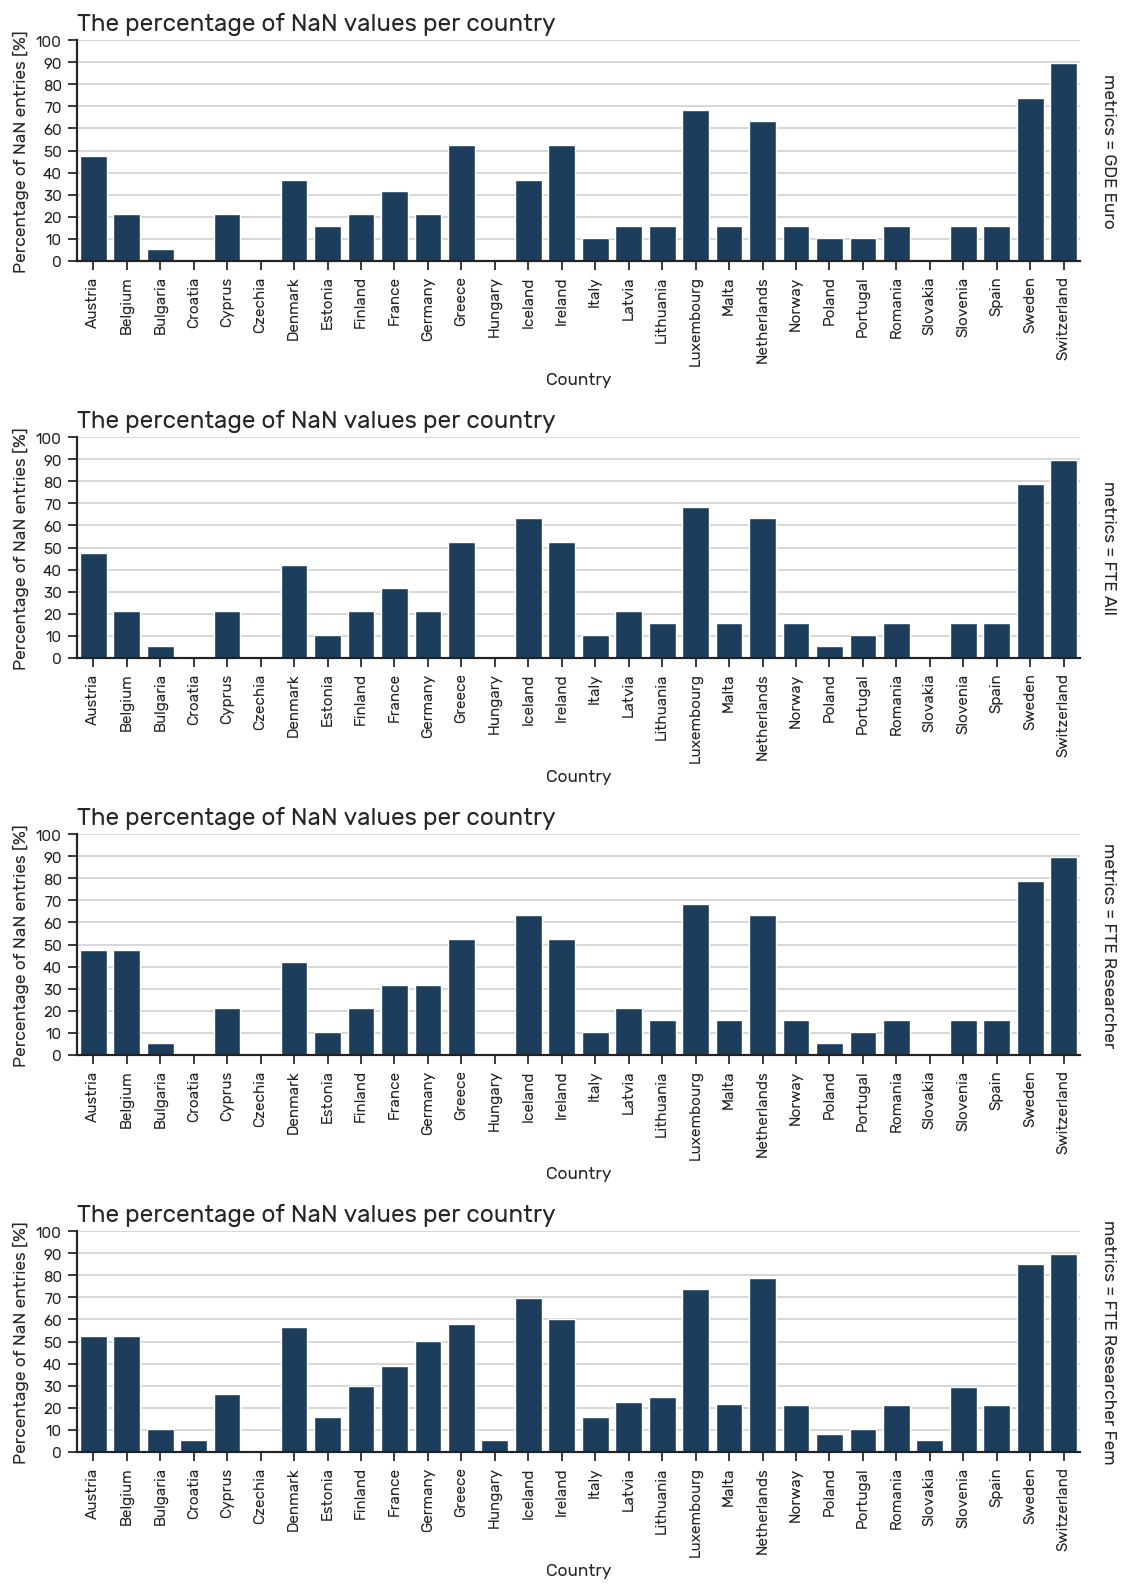

In [11]:
df_nans = df.groupby('Country')[['GDE Euro','FTE All', 'FTE Researcher', 'FTE Researcher Fem']].apply(
    lambda x: (x.isna().sum() * 100 / len(x) )).sort_values(by = 'Country')
df_nans = df_nans.stack().reset_index().rename(columns={'level_1': 'metrics', 0: 'value'})

g = sns.catplot(kind = 'bar', x = 'Country', y = 'value', row = 'metrics', height = 3, aspect = 3, 
                sharey = True, sharex = False, margin_titles = True,  data = df_nans)
g.set(title = 'The percentage of NaN values per country', 
      xlabel = "Country", ylabel = "Percentage of NaN entries [%]")
plt.yticks([0,10,20,30,40,50,60,70,80,90,100], ['0','10','20','30','40','50','60','70','80','90','100'])
g.tick_params(axis = 'x', rotation = 90)
g.figure.subplots_adjust(hspace = 0.8)
g.set(ylim = (0, 100))
plt.savefig('../figures/Fig1.3.1 The percentage of NaN values per country.png')
print("✓ Saved: Fig1.3.1 The percentage of NaN values per country")

The following countries include more than 50% of data entry gaps in all chosen metrics: Greece, Iceland, Ireland, Luxembourg, the Netherlands, Sweden and Switzerland.

#### The percentage of data entry gaps across years

✓ Saved: Fig1.3.2 The percentage of data entry gaps across years


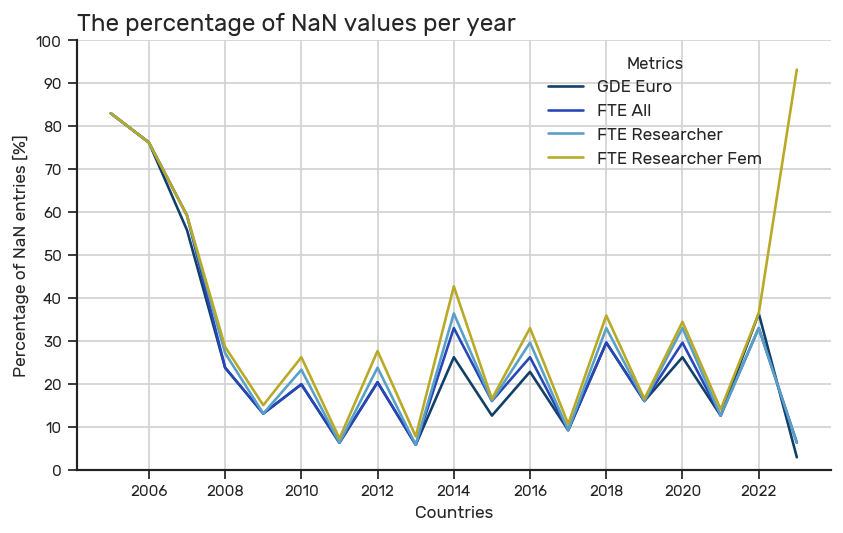

In [12]:
df_nans = df.groupby(
    'Year')[['GDE Euro','FTE All', 'FTE Researcher', 'FTE Researcher Fem']].apply(
    lambda x: (x.isna().sum() * 100 / len(x) )).sort_values(by = 'Year')
df_nans = df_nans.stack().reset_index().rename(columns={'level_1': 'metrics', 0: 'value'})

g = sns.relplot(kind = 'line', x = 'Year', y = 'value', data = df_nans, hue = 'metrics')
g.set(title = 'The percentage of NaN values per year', 
      xlabel = "Countries", ylabel = "Percentage of NaN entries [%]")
sns.move_legend(g, "upper right", title = 'Metrics', bbox_to_anchor = (0.68, 0.97))
g.set(ylim = (0, 100))
plt.yticks([0,10,20,30,40,50,60,70,80,90,100], ['0','10','20','30','40','50','60','70','80','90','100'])
g.fig.set_size_inches(10,4)
plt.savefig('../figures/Fig1.3.2 The percentage of data entry gaps across years.png')
print("✓ Saved: Fig1.3.2 The percentage of data entry gaps across years")

Temporal analysis reveals significant data entry issues in two periods: 
- pre-2008 period with missing data across all metrics;
- post-2022 period with specific gaps in female researcher statistics (*FTE Researcher Fem*).

These patterns inform the selection of the 2009-2021 analysis period for optimal data coverage.

#### Country Selection Based on Data Quality

Applying data quality criteria to select countries with solid data completeness (≥80% coverage across all metrics).

In [13]:
df_nans = df.groupby(['Country','geo'])[['GDE Euro','FTE All', 'FTE Researcher', 'FTE Researcher Fem']].apply(
    lambda x: (x.isna().sum() * 100 / len(x) )).sort_values(by = 'Country')
df_nans = df_nans[(df_nans['FTE Researcher'] <= 20) & (df_nans['FTE Researcher Fem'] <= 20) & (df_nans['FTE All'] <= 20) & (df_nans['GDE Euro'] <= 20)]
df_nans.reset_index(inplace = True)
df_nans.head(10)

,Country,geo,GDE Euro,FTE All,FTE Researcher,FTE Researcher Fem
0,Bulgaria,BG,5.263,5.263,5.263,10.526
1,Croatia,HR,0.000,0.000,0.000,5.263
2,Czechia,CZ,0.000,0.000,0.000,0.000
3,Estonia,EE,15.789,10.526,10.526,15.789
4,Hungary,HU,0.000,0.000,0.000,5.263
5,Italy,IT,10.526,10.526,10.526,15.789
6,Poland,PL,10.526,5.263,5.263,8.271
7,Portugal,PT,10.526,10.526,10.526,10.526
8,Slovakia,SK,0.000,0.000,0.000,5.263


The countries listed above demonstrate data completeness rates of at least 80% across all analytical metrics. These nine countries will be chosen for further analysis.

In [14]:
global set_of_countries
set_of_countries = df_nans.geo.unique()
df['geo_nan'] = df.apply(filter_countries, axis = 1)
df = df[df['geo_nan'] == "in"]
print(f"• Countries selected for analysis: {len(df.Country.unique())} countries")
print(f"• Selected countries: {df.Country.unique()}")

• Countries selected for analysis: 9 countries
• Selected countries: ['Bulgaria' 'Czechia' 'Estonia' 'Croatia' 'Hungary' 'Italy' 'Poland'
 'Portugal' 'Slovakia']


## O2 Efficiency and Labor Intensity analysis

How efficiently do chosen EU and EFTA countries convert R&D spending in the knowledge‑intensive services sector into human capital?

#### O2.1 Calculating Annual Spending Efficiency

Calculate and visualize annual spending efficiency metrics, defined as R&D expenditure per researcher full-time equivalent.

In [15]:
print("• Calculating Annual Spending Efficiency")
efficiency_calc = df.groupby(['Country', 'Year'])[['GDE Euro','FTE Researcher']].apply(
    lambda x: pd.Series({
        'SpendEff': x['GDE Euro'].sum() / x['FTE Researcher'].sum() 
            if not (x['GDE Euro'].isna().any() or x['FTE Researcher'].isna().any()) 
            else float('nan')})).reset_index()
df = df.merge(efficiency_calc, on=['Country', 'Year'], how = 'left')
nan_pct = df['SpendEff'].isnull().sum()*100/len(df['SpendEff'])
print(f"• SpendEff: {nan_pct:.0f}% values converted to NaN")

• Calculating Annual Spending Efficiency
• SpendEff: 6% values converted to NaN


✓ Saved: Fig2.1 Annual Spending Efficiency per a Researcher FTE


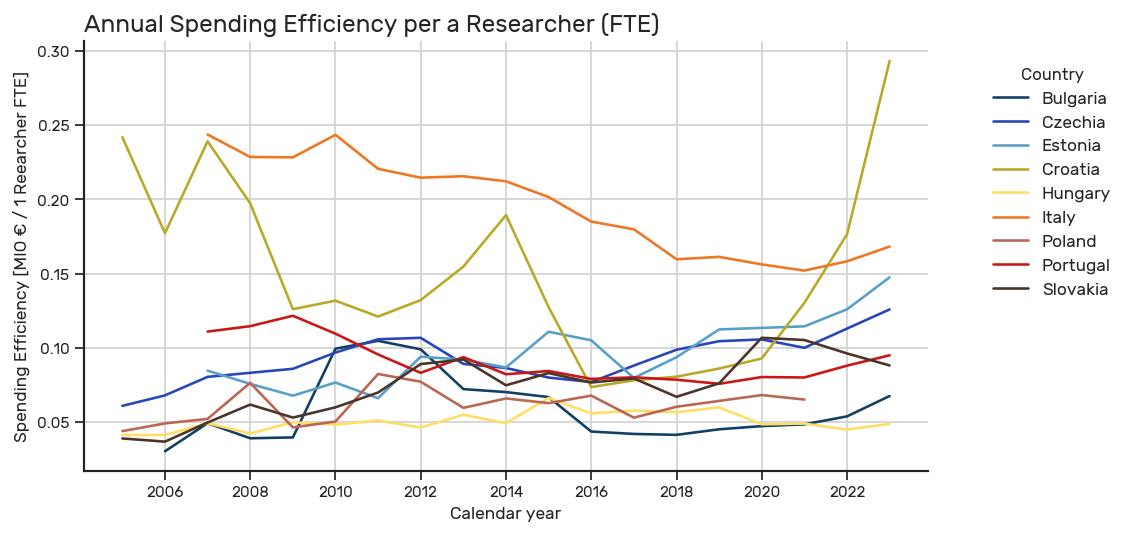

In [16]:
g = sns.relplot(kind = 'line', x = 'Year', y = 'SpendEff', data = df, hue = 'Country', errorbar = None)
sns.move_legend(g, "upper right", bbox_to_anchor = (0.975, 0.95), ncol = 1)
g.set(title = 'Annual Spending Efficiency per a Researcher (FTE)', 
      xlabel = "Calendar year", ylabel = "Spending Efficiency [MIO € / 1 Reearcher FTE]")
g.fig.set_size_inches(10,4)
plt.savefig('../figures/Fig2.1 Annual Spending Efficiency per a Researcher FTE.png')
print("✓ Saved: Fig2.1 Annual Spending Efficiency per a Researcher FTE")

Line chart showing how the Spending Efficiency (millions € / 1 Researcher FTE) evolves for each country between 2005 and 2023. Each country is a coloured line; the vertical axis is Spending Efficiency, the horizontal axis is Year. 

A rising efficiency curve was present for most countries. This could indicate: 
- an increase in R&D budgets for the knowledge‑intensive services sector;
- fewer full-time researcher positions;
- a combination of both. 

Only for Portugal and Italy was a decrease in spending efficiency observed. This could indicate:
- growing number of full-time researcher positions without proportional increase in spending (labor scaling);
- budget cuts for the knowledge‑intensive services sector;
- a combination of both.  

Interestingly, Croatia presented a volatile trend, with peaks of spending efficiency in 2005, 2007, 2014 and 2023, compared to a relatively low efficiency for the remaining years.

Poland presents a generally low but stable spending efficiency across years. 

**Insights**: 
- Croatia’s volatility could be caused by its late EU accession (2013) and benefits from episodic EU funding.
- Portugal’s and Italy’s decrease in spending efficiency could be caused by the austerity periods following the 2008 economic crisis (Wearden, 2011).

#### O2.2 Calculating Annual Labor Intensity

Calculating and visualizing annual labor intensity metrics, defined as researcher full-time equivalents per unit of R&D expenditure.

In [17]:
print("\n• Calculating Annual Labor Intensity")
labour_calc = df.groupby(['Country', 'Year'])[['GDE Euro','FTE Researcher']].apply(
    lambda x: pd.Series({
        'LaborInt': x['FTE Researcher'].sum() / (x['GDE Euro'].sum())
            if not (x['GDE Euro'].isna().any() or x['FTE Researcher'].isna().any()) 
            else float('nan')})).reset_index()
nan_pct = labour_calc['LaborInt'].isnull().sum()*100/len(labour_calc['LaborInt'])
print(f"• LaborInt: {nan_pct:.0f}% values converted to NaN")
df = df.merge(labour_calc, on=['Country', 'Year'], how = 'left')


• Calculating Annual Labor Intensity
• LaborInt: 6% values converted to NaN


✓ Saved: Fig2.2 Annual Labor Intensity per million euro


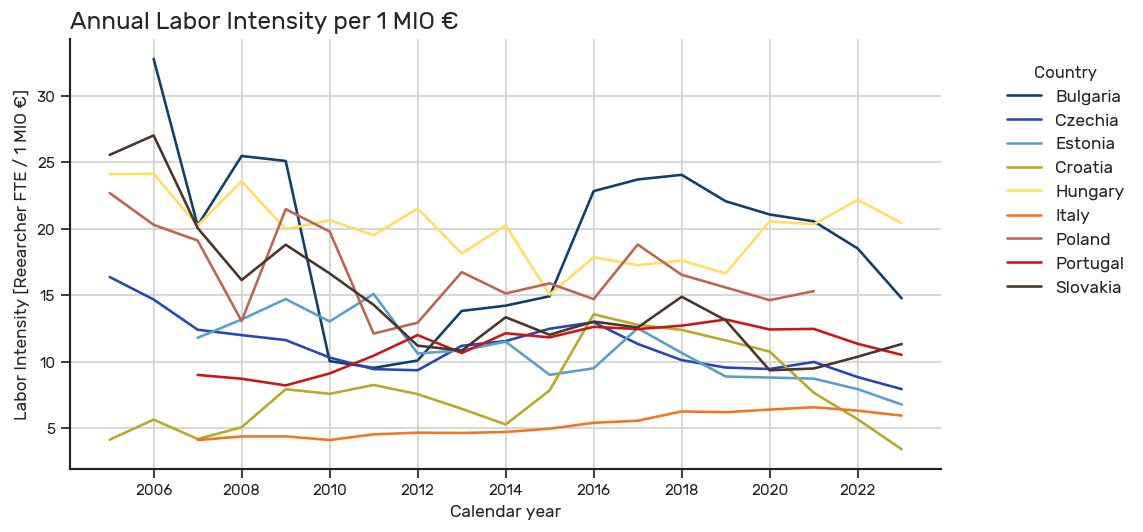

In [18]:
g = sns.relplot(kind = 'line', x = 'Year', y = 'LaborInt', data = df, hue = 'Country', errorbar = None)
sns.move_legend(g, "upper right", bbox_to_anchor = (0.975, 0.95), ncol = 1)
g.set(title = 'Annual Labor Intensity per 1 MIO €', 
      xlabel = "Calendar year", ylabel = "Labor Intensity [Reearcher FTE / 1 MIO €]")
g.fig.set_size_inches(10,4)
plt.savefig('../figures/Fig2.2 Annual Labor Intensity per million euro.png')
print("✓ Saved: Fig2.2 Annual Labor Intensity per million euro")

Line chart showing how the Labor Intensity (Researcher FTEs / 1 million €) evolves for each country between 2005 and 2023. Each country is a coloured line; the vertical axis is Labor Intensity; the horizontal axis is Year. 

A rise in labor intensity over time was observed only for Italy and Portugal.
<br> *Insights*: This labour-intensive expansion could partially explain the previously shown decrease in spending efficiency for those countries.

The rest of the countries increased spending faster than the number of full-time researcher positions in the knowledge‑intensive services sector.  

Poland presented a generally high labor intensity, with a volatile pattern between 2007 and 2011. 
<br> *Insights*: this volatility could be caused by its late EU accession (2004) and benefits from episodic EU funding.

## O3 Participation of female researchers and its relationship to the sector's growth rates

Does increasing female participation correlate with improved spending efficiency and labour intensity?

#### O3.1 Female researcher share analysis

Calculating and visualizing the proportion of female researchers in total researcher full-time equivalents.

In [19]:
print("• Calculating Female Share of Researcher FTEs")
femshare_calc = df.groupby(
    ['Country', 'Year'])[['FTE Researcher', 'FTE Researcher Fem']].apply(
    lambda x: pd.Series({
        'FemShare': x['FTE Researcher Fem'].sum() / (x['FTE Researcher'].sum())
            if not (x['FTE Researcher Fem'].isna().any() or x['FTE Researcher'].isna().any()) 
           else float('nan')})).reset_index()
nan_pct = femshare_calc['FemShare'].isnull().sum()*100/len(femshare_calc['FemShare'])
print(f"• FemShare: {nan_pct:.0f}% values converted to NaN")
df = df.merge(femshare_calc, on=['Country', 'Year'], how = 'left')

• Calculating Female Share of Researcher FTEs
• FemShare: 10% values converted to NaN


✓ Saved: Fig3.1 Annual Female Share of Researchers


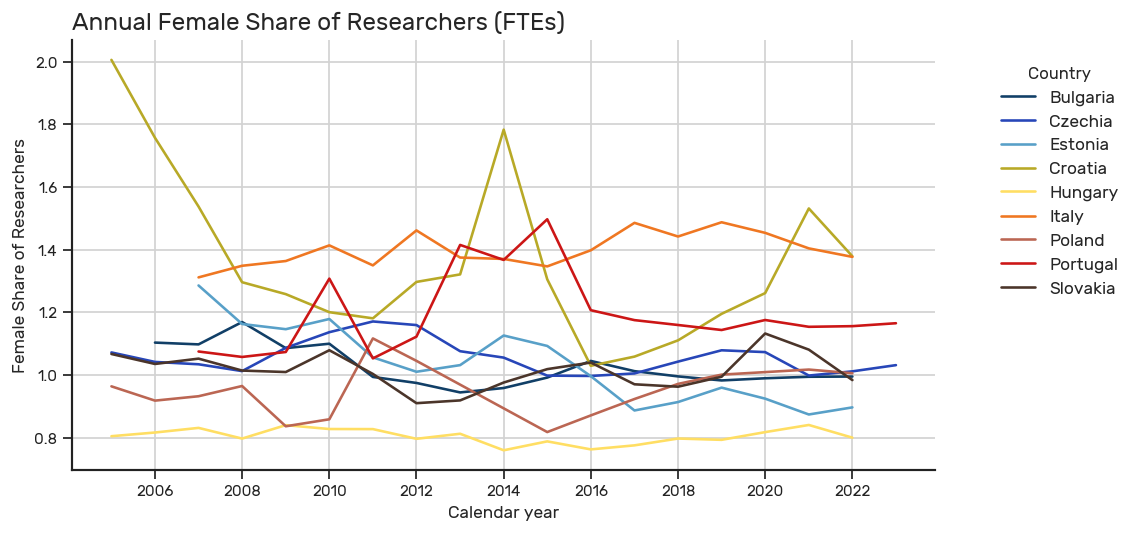

In [20]:
g = sns.relplot(kind = 'line', x = 'Year', y = 'FemShare', data = df, 
                hue = 'Country', errorbar = None)
sns.move_legend(g, "upper right", bbox_to_anchor = (0.975, 0.95), ncol = 1)
g.set(title = 'Annual Female Share of Researchers (FTEs)', 
      xlabel = "Calendar year", ylabel = "Female Share of Researchers")
g.fig.set_size_inches(10,4)
plt.savefig('../figures/Fig3.1 Annual Female Share of Researchers.png')
print("✓ Saved: Fig3.1 Annual Female Share of Researchers")

Line chart showing how the share of full-time researcher positions held by women in all full-time researcher positions (Female Researcher FTEs / Researcher FTEs) evolves for each country between 2005 and 2023. Each country is a coloured line; the vertical axis is Female Share; the horizontal axis is Year. 

A small rise in the share of female researchers was present only for Poland, Italy and Portugal. 
Only for Poland was this rise combined with a small increase in spending efficiency and a decrease in labour intensity. <br> *Insights*: Results obtained so far suggest Poland's structural modernisation rather than superficial workforce expansion.

For Italy and Portugal this increase in the share of female researchers was co-occurring with a decrease in spending efficiency and an increase in labour intensity.

Interestingly, both Portugal and Croatia recorded a rapid increase in full-time researcher positions held by women between 2013 and 2015.  <br> *Insights*: Those Female Share peaks could be temporally caused by EU-funded gender-inclusion projects (e.g., Horizon 2020).

#### O3.2 Relationship between Spending Efficiency and Female Share

Statistical correlation analysis between female researcher share and spending efficiency metrics.

In [21]:
print("• Preparing data for correlation analysis")
new_df = df[df['FemShare'].notna() & df['SpendEff'].notna()]
print(f"• Valid data points: {len(new_df):,} observations")

• Preparing data for correlation analysis
• Valid data points: 1,057 observations


Correlation test (CT): coefficients and statistical signifficance

  - Bulgaria: Normality violation - Spearman's r = -0.55, p = 6.38E-11
  - Czechia: Normality violation - Spearman's r = 0.31, p = 2.75E-04
  - Estonia: Normality violation - Spearman's r = -0.62, p = 1.03E-12
  - Croatia: Normality violation - Spearman's r = 0.87, p = 6.89E-40
  - Hungary: Normality violation - Spearman's r = -0.33, p = 1.51E-04
  - Italy: Normality violation - Spearman's r = -0.56, p = 8.86E-11
  - Poland: Normality violation - Spearman's r = 0.56, p = 7.61E-09
  - Portugal: Normality violation - Spearman's r = -0.33, p = 2.97E-04
  - Slovakia: Normality violation - Spearman's r = -0.16, p = 7.36E-02
✓ Saved: Fig3.2 Female Share vs Spending Efficiency


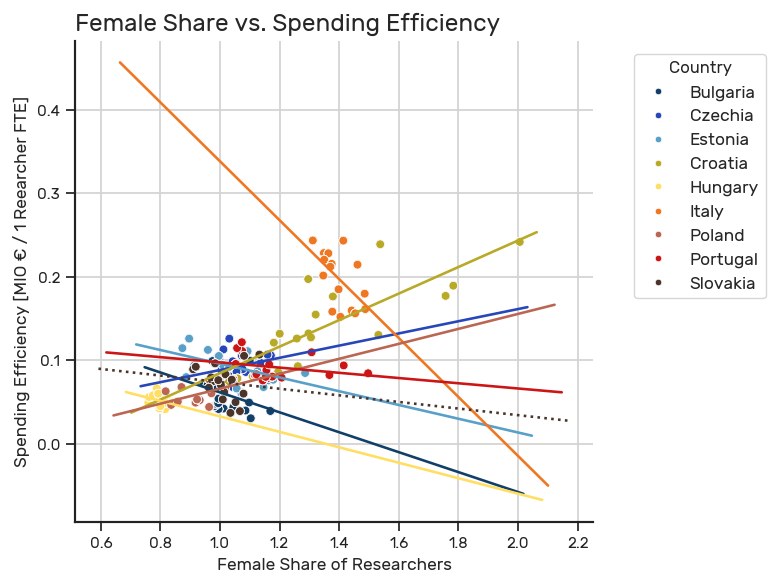

In [22]:
fig = plt.figure()
fig.set_size_inches(5.35, 5)
sns.scatterplot(data = new_df, x = 'FemShare', y = 'SpendEff', hue = 'Country')
plt.title('Female Share vs. Spending Efficiency')
plt.xlabel('Female Share of Researchers')
plt.ylabel('Spending Efficiency [MIO € / 1 Reearcher FTE]')

print('Correlation test (CT): coefficients and statistical signifficance\n')

for c in new_df['Country'].unique():
    x = new_df[new_df['Country'] == c]['FemShare']
    y = new_df[new_df['Country'] == c]['SpendEff']

    sh_x = shapiro(x)
    sh_y = shapiro(y)
    
    ax = plt.gca()
    ax.legend(title = 'Country', bbox_to_anchor = (1.35, 0.99))
    m, b = np.polyfit(x, y, 1)
    X_plot = np.linspace(ax.get_xlim()[0]+0.05, ax.get_xlim()[1]-0.05, 100)
    
    if (sh_x[1] <= 0.05) or (sh_y[1]  <= 0.05):
        stat, p = sp.stats.spearmanr(a = x, b = y)
        print(f"  - {c}: Normality violation - Spearman's r = {stat:.2f}, p = {p:.2E}")
        if p <= 0.05: 
            plt.plot(X_plot, m*X_plot + b, '-')
        else: 
            plt.plot(X_plot, m*X_plot + b, ':')
    else:  
        stat, p = sp.stats.pearsonr(x = x, y = y)
        print(f"  - {c}: Normal distribution - Pearson's r = {stat:.2f}, p = {p:.2E}")
        if p <= 0.05: 
            plt.plot(X_plot, m*X_plot + b, '-')
        else: 
            plt.plot(X_plot, m*X_plot + b, ':')    

plt.savefig('../figures/Fig3.2 Female Share vs Spending Efficiency.png')
print("✓ Saved: Fig3.2 Female Share vs Spending Efficiency")

Scatterplot showing how the spending efficiency (millions € / 1 Researcher FTE) relates to the share of full-time researcher positions held by women in all full-time researcher positions (Female Researcher FTEs / Researcher FTEs) between 2005 and 2023. A correlation for each country is a coloured line. The solid line represents a statistically significant correlation; the dotted line shows the lack of statistical significance. The vertical axis shows Spending Efficiency; the horizontal axis shows Female Share.

A positive correlation was calculated for Croatia, Czechia and Poland. For those countries, a growing share of full-time researcher positions held by women correlated with more efficient use of R&D budgets in the knowledge‑intensive services sector.

A negative correlation was observed for Italy, Portugal, Estonia, Hungary and Bulgaria. There, a growing share of full-time researcher positions held by women were related to the decrease in spending efficiency.

#### O3.3 Growth Rate analysis (2009-2021):

Compound annual growth rates (CAGR) for key metrics over the 2009-2021 period.

In [23]:
print("• Calculating Researcher FTE CAGR")
res_cagr_calc = df.query("(Year >= '2009') and (Year <= '2021')").sort_values(
    ['Country', 'Year']).groupby(
    ['Country'])[['FTE Researcher']].apply(
    lambda x: pd.Series({
        'Res CAGR 2009_2021': ((x.iloc[-1,].item() / x.iloc[0,].item())**(1/13) - 1)
              if not (x.iloc[0,].isna().any())
              else float('nan')})).reset_index()
nan_pct = res_cagr_calc['Res CAGR 2009_2021'].isnull().sum()*100/len(res_cagr_calc['Res CAGR 2009_2021'])
print(f"  - Res CAGR: {nan_pct:.0f}% values converted to NaN")
df = df.merge(res_cagr_calc, on=['Country'], how = 'left')

• Calculating Researcher FTE CAGR
  - Res CAGR: 0% values converted to NaN


In [24]:
print("• Calculating Female Researcher FTE CAGR")
fem_res_cagr_calc = df.query("(Year >= '2009') and (Year <= '2021')").sort_values(
    ['Country', 'Year']).groupby(
    ['Country'])[['FTE Researcher Fem']].apply(
    lambda x: pd.Series({
        'Fem Res CAGR 2009_2021': ((x.iloc[-1,].item() / x.iloc[0,].item())**(1/13) - 1)
              if not (x.iloc[0,].isna().any())
              else float('nan')})).reset_index()
nan_pct = fem_res_cagr_calc['Fem Res CAGR 2009_2021'].isnull().sum()*100/len(fem_res_cagr_calc['Fem Res CAGR 2009_2021'])
print(f"  - Fem Res CAGR: {nan_pct:.0f}% values converted to NaN")
df = df.merge(fem_res_cagr_calc, on=['Country'], how = 'left')

• Calculating Female Researcher FTE CAGR
  - Fem Res CAGR: 0% values converted to NaN


In [25]:
print("• Calculating Spending Efficiency CAGR")
cagr_calc = df.query("(Year >= '2009') and (Year <= '2021')").sort_values(
    ['Country', 'Year']).groupby(
    ['Country'])[['SpendEff']].apply(
    lambda x: pd.Series({
        'SpendEff CAGR 2009_2021': ((x.iloc[-1,].item() / x.iloc[0,].item())**(1/13) - 1)
              if not (x.iloc[0,].isna().any())
              else float('nan')})).reset_index()
nan_pct = cagr_calc['SpendEff CAGR 2009_2021'].isnull().sum()*100/len(cagr_calc['SpendEff CAGR 2009_2021'])
print(f"  - SpendEff CAGR: {nan_pct:.0f}% values converted to NaN")
df = df.merge(cagr_calc, on=['Country'], how = 'left')

• Calculating Spending Efficiency CAGR
  - SpendEff CAGR: 0% values converted to NaN


In [26]:
print("• Calculating Female Share CAGR")
femshare_cagr_calc = df.query("(Year >= '2009') and (Year <= '2021')").sort_values(
    ['Country', 'Year']).groupby(
    ['Country'])[['FemShare']].apply(
    lambda x: pd.Series({
        'FemShare CAGR 2009_2021': ((x.iloc[-1,].item() / x.iloc[0,].item())**(1/13) - 1)
              if not (x.iloc[0,].isna().any())
              else float('nan')})).reset_index()
nan_pct = femshare_cagr_calc['FemShare CAGR 2009_2021'].isnull().sum()*100/len(femshare_cagr_calc['FemShare CAGR 2009_2021'])
print(f"  - FemShare CAGR: {nan_pct:.0f}% values converted to NaN")
df = df.merge(femshare_cagr_calc, on=['Country'], how = 'left')

• Calculating Female Share CAGR
  - FemShare CAGR: 0% values converted to NaN


In [27]:
print("• Preparing CAGR data for visualization")
df_cagr = df.melt(id_vars = ['Country','geo', 'Year'],
                  value_vars = df.columns[11:15], 
                  var_name = 'CAGR types', 
                  value_name = 'CAGR value').drop_duplicates()
df_cagr = df_cagr[['Country', 'geo', 'Year', 'CAGR types', 'CAGR value']]

• Preparing CAGR data for visualization


✓ Saved: Fig3.3 CAGRs between 2009 and 2021


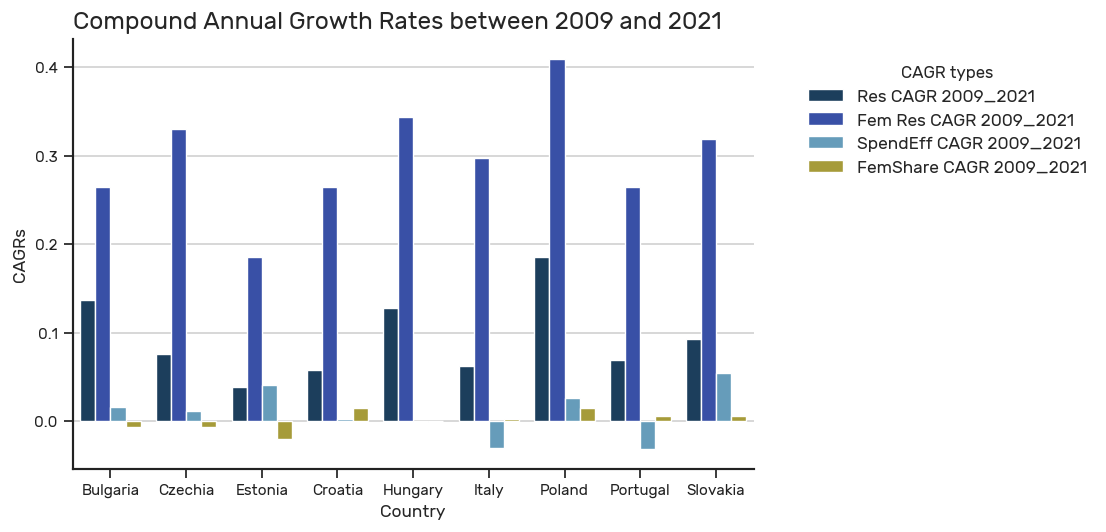

In [28]:
g = sns.catplot(kind = 'bar', x = 'Country', y = 'CAGR value', hue = 'CAGR types', data = df_cagr)
g.set(title = 'Compound Annual Growth Rates between 2009 and 2021', xlabel = "Country", ylabel = "CAGRs")
sns.move_legend(g, "upper right", bbox_to_anchor = (0.95, 0.95), ncol = 1)
g.fig.set_size_inches(10,4)
plt.savefig('../figures/Fig3.3 CAGRs between 2009 and 2021.png')
print("✓ Saved: Fig3.3 CAGRs between 2009 and 2021")

Bar chart comparing compound annual growth rates (CAGR) of chosen metrics calculated for the 2009-2021 period between countries:
- *Res CAGR 2009_2021*: average yearly growth rate in the number of all full-time researcher positions
- *Fem Res CAGR 2009_2021*: average yearly growth rate in the number of full-time researcher positions held by women 
- *SpendEff CAGR 2009_2021*: average yearly growth rate in spending efficiency
- *FemShare CAGR 2009_2021*: average yearly growth rate in share of full-time researcher positions held by women in all full-time researcher positions

All countries analysed here presented an increase in the workforce (number of full-time researcher positions). In all countries the number of those positions held by women was also accelerating. <br> *Insights*: This can be caused by an active inclusion of women in R&D driven by targeted education and hiring policies or sectoral shifts.

Positive growth rates for spending efficiency and female share were observed only for Poland and Slovakia. Results show that a growing workforce was supported by better funding per researcher FTE and increasing diversity.  <br> *Insights*: Poland and Slovakia could be examples of balanced growth and true diversity improvement.

Next, Croatia presented a stagnant spending efficiency. <br> *Insights*: This could be a result of a costly initial phase of diversity enactment (shown by an increasing Female Share) that temporally affects spending (Niederle, 2008).

Three countries, Bulgaria, Czechia and Estonia, presented increasing growth rates in spending efficiency. However, the share of female researcher positions decreased over the analysed period. This suggests that new positions created by the fast-expanding sector were still mainly taken by men.

Despite a growing workforce, Italy and Portugal recorded a decrease in spending efficiency. <br> *Insights*: Similarly to Croatia, this could be a sign of a high cost of an initial phase of diversity enactment. However, the supposed growing diversity is not yet represented by the Female Share growth for Italy.

Finally, Hungary's situation is characterised by a stagnant spending efficiency and share of female researcher positions. <br> *Insights*: Again, this may imply labor expansion without productivity increase.

In [29]:
print("Saving analysis results:")

df.to_csv('../data/analysis_data.csv', encoding='utf-8', index = False)
print(f"✓ Main analysis dataset saved: ../data/analysis_data.csv ({df.shape[0]:,} rows)")

Saving analysis results:
✓ Main analysis dataset saved: ../data/analysis_data.csv (1,197 rows)


In [30]:
df_cagr.to_csv('../data/cagr_analysis_data.csv', encoding='utf-8', index = False)
print(f"✓ CAGR analysis dataset saved: ../data/cagr_analysis_data.csv ({df_cagr.shape[0]:,} rows)")

✓ CAGR analysis dataset saved: ../data/cagr_analysis_data.csv (684 rows)


## Summary and results interpretation

### Source metadata

Current analysis was prepare based on the following information sources:

In [31]:
print("Data Sources:")
print("• Current analysis was prepared based on the following information sources:")

for i, row in mdf.iterrows():
    print(f"  {i+1}. {mdf.dataset_id[i]} dataset provided by: {mdf.dataset_source[i]}")
    print(f"     Last updated: {mdf.dataset_last_updated[i]}")
print()

Data Sources:
• Current analysis was prepared based on the following information sources:
  1. htec_sti_exp2 dataset provided by: Eurostat
     Last updated: 29/09/2025 23:00
  2. htec_sti_pers2 dataset provided by: Eurostat
     Last updated: 29/09/2025 23:00
  3. rd_​p_​bempoccr2 dataset provided by: Eurostat
     Last updated: 02/05/2025 11:00



### Methodological Limitations

- Data Coverage: Substantial missing data exists before 2008 and after 2022, with optimal metric comparability limited to the 2009-2021 period.

- Country selection: Analysis is restricted to 9 countries meeting data quality criteria (>80% completeness), results do not include full EU/EFTA region.

- Sector heterogeneity: NACE G–N covers multiple service subsectors that can influence spending and hiring patterns.

- Correlation: correlations do not imply causation. Observed links between female share and efficiency may reflect confounders (economic structure, policy, funding cycles). <br>

Important note: Offered insights are not based on a structured academic knowledge about EU policy or geo-political structure of discussed countries. My aim was to simply demonstrate my ability to understand complex datasets, data characteristics and measures that are outside my primary academic expertise.

### Summary

The analysis investigated the evolution of female participation in research and development (R&D) activities within the knowledge-intensive services sector (NACE G–N) across nine European countries between 2005 and 2023. Most countries demonstrated rising R&D spending efficiency and a growing workforce, but the degree of diversity varied.

Across most countries, spending efficiency increased between 2005 and 2023, suggesting higher R&D budgets. Yet, Italy and Portugal presented decreasing spending efficiency—likely linked to increasing the workforce without proportional funding growth. Conversely, Poland maintained stable but relatively low spending efficiency, paired with high but stable labor intensity. This suggests a system where funding per researcher remains constrained, yet employment opportunities—including for women—have expanded gradually.

Female researcher representation showed gradual improvement in most countries, particularly Poland, Italy, and Portugal. However, in several cases (e.g., Italy and Portugal), the increase in female share coincided with declining spending efficiency. This supports existing literature suggesting that diversity investments may initially raise organisational and financial costs before translating into efficiency gains (e.g., Niederle et al., 2013; Capozza & Divella, 2023). The Female Share–Efficiency correlation analysis revealed two clear groups:
- Positive correlations (Croatia, Czechia, Poland) implying that female inclusion coincided with more effective use of R&D resources—possibly reflecting balanced growth strategies.
- Negative correlations (Italy, Portugal, Estonia, Hungary, Bulgaria) likely reflecting initial costs of diversity enactment, where organisations embrace the entry costs of diversifying their workforce.

Between 2009 and 2021, all countries increased their total researcher workforce, and in all, the number of female researchers grew faster than overall employment. This confirms a trend toward gender inclusivity in the R&D sector. However, only Poland and Slovakia demonstrated balanced growth—simultaneous increases in spending efficiency, female share, and workforce size. Croatia, Italy and Portugal showed stagnant or declining efficiency but strong female inclusion, implying a high entry costs of diversifying that could benefit them in the future. By contrast, Bulgaria, Czechia, and Estonia improved efficiency but experienced declines in female share, suggesting a prioritisation of efficiency over diversity.

### Conclusions

**General trends**: Most countries showed increasing R&D spending efficiency and growing researcher workforces (2005–2023). Full-time research positions held by women increased faster than overall researcher growth in all analysed countries. <br> 
*Business Insight*: countries can be categorised as balanced, inclusion-phase, or efficiency-first.

  - **Balanced growth**: Poland and Slovakia increased spending efficiency, female share, and workforce size concurrently. <br> *Business Insight*: diversity initiatives combined with targeted funding and organizational change could result in a stable growth.

  - **Initial investment**: Italy, Portugal, and Croatia show rising female participation together with stagnant or declining spending efficiency — consistent with potential initial integration costs (recruitment, training). <br> *Business Insight*: gender-diversity investments may increase short-term costs but can bring long-term efficiency benefits.
      
  - **Efficiency prioritization**: Bulgaria, Czechia, and Estonia improved spending efficiency but presented declines in female share - their expansion may have favoured male-dominated recruitment or sub-sectors.

## References

Carucci, R. (2024) “One More Time: Why Diversity Leads to Better Team Performance.” *Forbes*.

Hoogendoorn, S., Oosterbeek, H., & van Praag, M. (2019) “When Gender Diversity Makes Firms More Productive.” *Harvard Business Review*.

Niederle, M., Segal, C., & Vesterlund, L. (2008) How Costly is Diversity? Affirmative Action in Light of Gender Differences in Competitiveness. *NBER Working Paper*.

Phillips, K. (2014) “How Diversity Makes Us Smarter.” *Scientific American*.

Wearden, G. (2011) "EU debt crisis: Italy hit with rating downgrade". *The Guardian*. 